In [1]:
import requests

# Dataset URL
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0271EN-SkillsNetwork/labs/v1/m3/data/used_car_price_analysis.csv"

# Download dataset
response = requests.get(url)

# Save as local CSV file
with open("used_car_price_analysis.csv", "wb") as file:
    file.write(response.content)

print("✅ Dataset downloaded successfully as 'used_car_price_analysis.csv'")


✅ Dataset downloaded successfully as 'used_car_price_analysis.csv'


In [3]:
import pandas as pd

file_path = "used_car_price_analysis.csv"
df = pd.read_csv(file_path)

# Step 2: Print the first 5 rows to verify correct loading
print("First 5 rows of the DataFrame:")
print(df.head())


First 5 rows of the DataFrame:
     model  year transmission  mileage fuelType    tax   mpg  engineSize  \
0   Fiesta  2017    Automatic    15944   Petrol  150.0  57.7         1.0   
1    Focus  2018       Manual     9083   Petrol  150.0  57.7         1.0   
2    Focus  2017       Manual    12456   Petrol  150.0  57.7         1.0   
3   Fiesta  2019       Manual    10460   Petrol  145.0  40.3         1.5   
4   Fiesta  2019    Automatic     1482   Petrol  145.0  48.7         1.0   

   price  
0  12000  
1  14000  
2  13000  
3  17500  
4  16500  


In [7]:
import pandas as pd

df = pd.read_csv("used_car_price_analysis.csv")

# 1. Columns with missing values
print("Columns with missing values:", df.columns[df.isna().any()].tolist())

# 2. Replace missing values with column mean (numeric only)
df.fillna(df.mean(numeric_only=True), inplace=True)

# 3. Remove duplicate rows
df.drop_duplicates(inplace=True)

print("\nCleaned DataFrame (first 5 rows):")
print(df.head())


Columns with missing values: ['tax']

Cleaned DataFrame (first 5 rows):
     model  year transmission  mileage fuelType    tax   mpg  engineSize  \
0   Fiesta  2017    Automatic    15944   Petrol  150.0  57.7         1.0   
1    Focus  2018       Manual     9083   Petrol  150.0  57.7         1.0   
2    Focus  2017       Manual    12456   Petrol  150.0  57.7         1.0   
3   Fiesta  2019       Manual    10460   Petrol  145.0  40.3         1.5   
4   Fiesta  2019    Automatic     1482   Petrol  145.0  48.7         1.0   

   price  
0  12000  
1  14000  
2  13000  
3  17500  
4  16500  


# **Data Insights and Visualization**

In [13]:
#Identify the 5 attributes that have the highest correlation with the price parameter.
import pandas as pd

df = pd.read_csv("used_car_price_analysis.csv")
target = 'price'   # 👈 yahan actual target column ka naam likho

top5 = df.corr(numeric_only=True)[target].abs().sort_values(ascending=False).drop(target).head(5)
print("Top 5 correlated attributes:\n", top5)



Top 5 correlated attributes:
 year          0.636009
mileage       0.530659
engineSize    0.411178
tax           0.406895
mpg           0.346419
Name: price, dtype: float64


In [17]:
#Count the number of cars under each unique value of fuelType attribute.
import pandas as pd

df = pd.read_csv("used_car_price_analysis.csv")


column_name = 'fuelType'


value_counts = df[column_name].value_counts()

print(f"Count of entries for each unique value in '{column_name}':\n")
print(value_counts)


Count of entries for each unique value in 'fuelType':

fuelType
Petrol      12179
Diesel       5762
Hybrid         22
Electric        2
Other           1
Name: count, dtype: int64


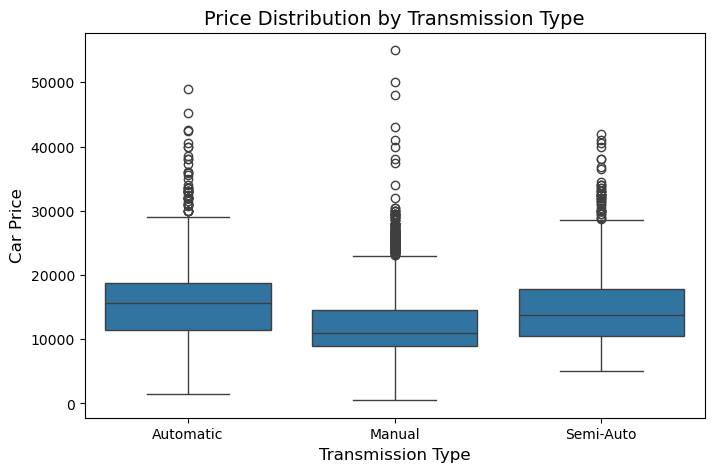

In [24]:
#Create a Box plot to determine whether cars with automatic, manual or semi-auto type of transmission have more price outliers. Use the Seaborn library for creating the plot.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("used_car_price_analysis.csv")

# Create a box plot to compare price distributions by transmission type
plt.figure(figsize=(8, 5))
sns.boxplot(x='transmission', y='price', data=df)

# Add titles and labels
plt.title("Price Distribution by Transmission Type", fontsize=14)
plt.xlabel("Transmission Type", fontsize=12)
plt.ylabel("Car Price", fontsize=12)

# Display the plot
plt.show()


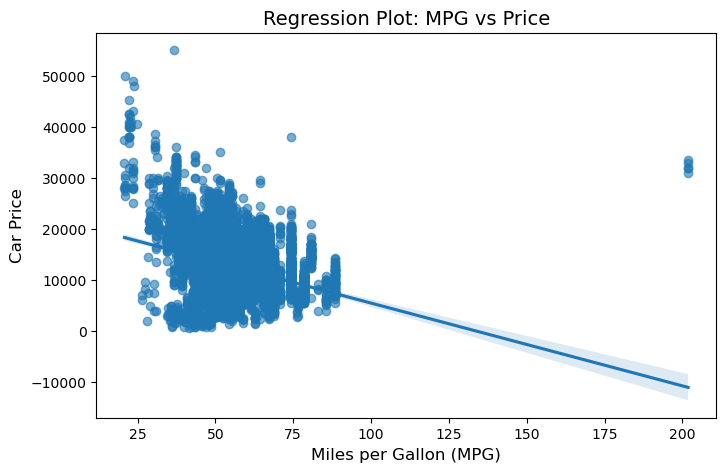

In [26]:
#Generate the regression plot between mpg parameter and the price to determine the correlation type between the two.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("used_car_price_analysis.csv")

# Create regression plot between mpg and price
plt.figure(figsize=(8, 5))
sns.regplot(x='mpg', y='price', data=df, scatter_kws={'alpha':0.6})

# Add titles and labels
plt.title("Regression Plot: MPG vs Price", fontsize=14)
plt.xlabel("Miles per Gallon (MPG)", fontsize=12)
plt.ylabel("Car Price", fontsize=12)

# Show plot
plt.show()


# **Model Development and Evaluation**

In [32]:
#Fit a linear regression model to predict the price using the feature mpg. Then calculate the R^2 and MSE values for the model.
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load your dataset
df = pd.read_csv("used_car_price_analysis.csv")

# Step 2: Define source (X) and target (y) variables
X = df[['mileage']]   # independent variable (source)
y = df['price']       # dependent variable (target)

# Step 3: Create and fit the Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Step 4: Predict target values
y_pred = model.predict(X)

# Step 5: Calculate R² and MSE
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

# Step 6: Display results
print(f"R² (Coefficient of Determination): {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")


R² (Coefficient of Determination): 0.2816
Mean Squared Error (MSE): 16148997.28


In [36]:
#Fit a linear regression model to predict the price using the following set of features.
#year, mileage, tax, mpg and engineSize.
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
df = pd.read_csv("used_car_price_analysis.csv")
df = df.dropna(subset=['year', 'mileage', 'tax', 'mpg', 'engineSize', 'price'])
X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
y = df['price']
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
print("Linear Regression Model Evaluation:")
print(f"R² (Coefficient of Determination): {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")



Linear Regression Model Evaluation:
R² (Coefficient of Determination): 0.7267
Mean Squared Error (MSE): 6143538.75


In [38]:
#For the same set of features as in the question above, create a pipeline model object that uses standard scalar, second degree polynomial features and a linear regression model. Calculate the R^2 value and the MSE value for this model.
import pandas as pd
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error

# Step 1: Load dataset
df = pd.read_csv("used_car_price_analysis.csv")

# Step 2: Define features (X) and target (y)
X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
y = df['price']

# Step 3: Handle missing values (important)
df = df.dropna(subset=['year', 'mileage', 'tax', 'mpg', 'engineSize', 'price'])
X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
y = df['price']

# Step 4: Create a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),                # Standardize features
    ('poly', PolynomialFeatures(degree=2)),      # Add second-degree polynomial terms
    ('model', LinearRegression())                # Linear regression model
])

# Step 5: Fit the pipeline model
pipeline.fit(X, y)

# Step 6: Predict target values
y_pred = pipeline.predict(X)

# Step 7: Evaluate model performance
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

print("Polynomial Regression (degree=2) Model Evaluation:")
print(f"R² (Coefficient of Determination): {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")


Polynomial Regression (degree=2) Model Evaluation:
R² (Coefficient of Determination): 0.7666
Mean Squared Error (MSE): 5245857.69


In [40]:
#For the same set of features, split the data into training and testing data parts. Assume testing part to be 20%. Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 using the test data.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load dataset
df = pd.read_csv("used_car_price_analysis.csv")

# Step 2: Define features (X) and target (y)
X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]   # source attributes
y = df['price']                                           # target attribute

# Step 3: Handle missing values if any
df = df.dropna(subset=['year', 'mileage', 'tax', 'mpg', 'engineSize', 'price'])
X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
y = df['price']

# Step 4: Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Create and fit Ridge Regression model (α = 0.1)
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)

# Step 6: Predict on test data
y_pred = ridge_model.predict(X_test)

# Step 7: Evaluate model performance
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Ridge Regression Model Evaluation (α = 0.1):")
print(f"R² (Coefficient of Determination): {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")


Ridge Regression Model Evaluation (α = 0.1):
R² (Coefficient of Determination): 0.7298
Mean Squared Error (MSE): 6125907.59


In [44]:
#Perform a second order polynomial transform on both the training data and testing data created for the question above. Create and fit a Ridge regression object using the modified training data, set the regularisation parameter to 0.1, and calculate the R^2 and MSE utilising the modified test data.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

# Load dataset
df = pd.read_csv("used_car_price_analysis.csv")
df = df.dropna(subset=['year', 'mileage', 'tax', 'mpg', 'engineSize', 'price'])

X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
y = df['price']

# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with scaling, polynomial expansion, and Ridge regression
model = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('ridge', Ridge(alpha=0.1))
])

# Fit and predict
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Polynomial Ridge Regression (degree=2, α=0.1) with StandardScaler:")
print(f"R² (Coefficient of Determination): {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
                                                                                                                                             

Polynomial Ridge Regression (degree=2, α=0.1) with StandardScaler:
R² (Coefficient of Determination): 0.7557
Mean Squared Error (MSE): 5539190.82


In [46]:
#In the question above, perform a Grid Search on ridge regression for a set of values of alpha {0.01, 0.1, 1, 10, 100} with 4-fold cross validation to find the optimum value of alpha to be used for the prediction model.
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load the dataset
df = pd.read_csv("used_car_price_analysis.csv")

# Define source (X) and target (y) attributes
X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
y = df['price']

# Handle missing values (important)
df = df.dropna(subset=['year', 'mileage', 'tax', 'mpg', 'engineSize', 'price'])
X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
y = df['price']

# Step 2: Split into training and testing data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create a pipeline with scaling, polynomial features, and Ridge regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('ridge', Ridge())
])

# Define alpha values for Grid Search
param_grid = {'ridge__alpha': [0.01, 0.1, 1, 10, 100]}

# Create Grid Search with 4-fold Cross Validation
grid_search = GridSearchCV(pipeline, param_grid, cv=4, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best alpha found
best_alpha = grid_search.best_params_['ridge__alpha']
print(f"✅ Best alpha value found using Grid Search: {best_alpha}")

# Step 4: Evaluate the best model on test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate R² and MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("\nRidge Regression Model Evaluation (with Polynomial degree=2):")
print(f"R² (Coefficient of Determination): {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")


✅ Best alpha value found using Grid Search: 100

Ridge Regression Model Evaluation (with Polynomial degree=2):
R² (Coefficient of Determination): 0.7560
Mean Squared Error (MSE): 5531361.78


In [48]:
df.to_csv("used_car_price_cleaned.csv", index=False)
